## Eigen & Singular Value Decomp

**Unsupervised learning: summarizing data, dimensionality reduction**

**Abstract:** Eigendecomposition is an important step in many algorithms: spectral clustering, principal component analysis, ISOMAP etc. When it comes to computing the eigenvalues and eigenvectors, there is more than one way to skin that cat. Besides implementing that code yourself or turning to eigendecomp functions provided by numpy or scipy, one can also use SVD. There's a small tweak needed though. The purpose of this notebook is to show the relation between eigendecomp and SVD. 

**Topics covered:** eigenvalue problem, eigendecomposition, eigenvalues, eigenvectors, singular value decomposition (SVD), eigenfaces.

**First things first.** Before showing the formal definitions of eigendecomposition (ED) and singular value decomposition (SVD), let's first provide the definition of the sample covariance matrix and the centered data matrix. This will become very handy later in this demonstration.

Given $n$ data points with $p$ features, $\{x_1,x_2,\dots,x_p\} \in \mathbb{R}^n$, we define the sample covariance matrix, $C \in \mathbb{R}^{p \times p}$, which is symmetrical (i.e. a square matrix), as

$$
C = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^T(x_i - \mu),
$$

or simply

$$
C = M^TM
$$

where M is the centered data matrix $X - \mu$.

**The eigenvalue problem**. Given this symmetric matrix $C$ we find a vector $u \in \mathbb{R}^p$ such that 

$$
Cu = \lambda u.
$$

The vector $u$ is ortho-normal, meaning (1) it's orthogonal to other such vector $u_i^Tu_j = 0$, and (2) has unit length $\|u\|=u^Tu=1$ (inner product).

Loosly put, the vector $u$ represents some intrinsic value of $C$. Thus, $u$ is known as an eigenvector of $C$ and $\lambda$ as its corresponding eigenvalue. The product $\lambda u$ represents a scaled version of $u$ that doesn't change the direction of $u$ but only its magnitude.

There will be multiple solutions to this problem; thus, $u_1,u_2,\dots,u_p$ are all eigenvectors with different $\lambda_1,\lambda_2,\dots,\lambda_p$ eigenvalues. Note though, that the eigenvalues aren't necessarily unique. So multiple eigenvectors can be associated with the same eigenvalue.

**Eigendecomp.** Thus, the eigendecomposition of $C$ is

$$
C = U \Lambda U^T,
$$

where

$U \in \mathbb{R}^{p \times p}$ and $\Lambda = diag(\lambda_1,\lambda_2,\dots,\lambda_p)$. Typically, the eigenvalues as sorted in descending order, so $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p$. Moreover, $U$ is a square matrix and also ortho-normal. Its columns are the eigenvectors of unit length $\|u_i\|=1$, and its transpose corresponds to its inverse $U^TU = U^{-1}U = I$.

**Singular value decomp.** Given the real matrix $M \in \mathbb{R}^{n \times p}$ where $n \geq p$, SVD is the product of three matrices

$$
M = U \Sigma V^T
$$

$$
M = [u_1 u_2 \dots u_n]
\begin{bmatrix}
  \sigma_1 &        &           \\
           & \ddots &           \\
           &        & \sigma_{p}
\end{bmatrix}
[v_1 v_2 \dots v_p].
$$

$U \in \mathbb{R}^{n\times n}$ are the left singular vectors, $V \in \mathbb{R}^{p\times p}$ the right singular vectors and $\Sigma \in \mathbb{R}^{p\times p}$ is a diagonal matrix with the singular values $\sigma_1,\sigma_2,\dots,\sigma_p$ where typically $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_p$.

**Where's the relation?** Say we want to find the eigenpairs $\{(u_1,\lambda_1), (u_2,\lambda_2), \dots, (u_p,\lambda_p)\}$ of the data matrix $X$. We can these with two equivalent approaches, namely

1. computing the eigendecomposition (ED) of the sample covariance matrix, $C$, or 
2. computing the singular value decomposition (SVD) of the centered data matrix, $M$.

#boom

This fact becomes apparent when looking back at the definition of the sample covariance matrix:

$$
C=M^TM.
$$

If we substitute $M$ by the SVD definition above then

$$
C = M^TM = (U\Sigma V^T)^T U\Sigma V^T.
$$

Since $(ab)^T = b^T a^T$ (transpose property) we get

$$
C = V \Sigma^T U^T U\Sigma V^T.
$$

And since $U$ is orthogonal, i.e. $U^TU = I$, we end up with

$$
C = V \Sigma^T \Sigma V^T.
$$

Note that $\Sigma^T \Sigma$ corresponds to

$$
\begin{equation}
\Sigma^T \Sigma =
\begin{bmatrix}
  \sigma_1 &        &           \\
           & \ddots &           \\
           &        & \sigma_{p}\\
\end{bmatrix}
\begin{bmatrix}
  \sigma_1 &        &           \\
           & \ddots &           \\
           &        & \sigma_{p}
\end{bmatrix}
\end{equation} =
\begin{bmatrix}
  \sigma_1^2 &        &             \\
             & \ddots &             \\
             &        & \sigma_{p}^2
\end{bmatrix}.
$$

Thus, 

* the right singular vectors in the SVD of $M$, $v^T_i$, are equivalent to the eigenvectors of $C$, $u_i$; whereas
* the squared singular values in the SVD of $M$, $\sigma_i^2$, correspond to the eigenvalues of $C$, $\lambda_i$.

$$
C = V \Sigma^T \Sigma V^T = U \Lambda U^T.
$$

## Demo: Yale Face data set

Let's demo this using an excerpt of data from the famous Yale Face dataset (Face recognition using eigenfaces, M.A Turk and A.P. Pentland, IEEE computer society conference on computer vision and pattern recognition (1991) 586-587).

In [1]:
# Loads
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import svd
from scipy.sparse.linalg import eigs
from skimage.measure import block_reduce
from PIL import Image
from matplotlib.pyplot import boxplot

As part of preprocessing, we will downsample each image by a factor of 4 to turn them into a lower resolution image. Let's build a helper function to help with this routine.

Text(0.5, 1.0, 'Downsample (61 x 80)')

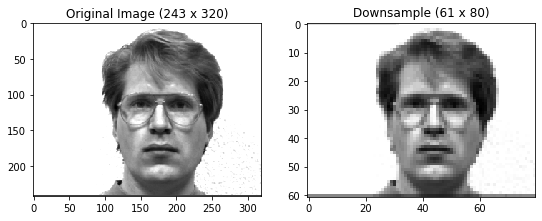

In [2]:
# demo one image
im_raw = Image.open('data/yalefaces/subject01.glasses.gif')
im_orig = np.asarray(im_raw)
# downsample by a factor of 4
h = int((im_raw.size[0] / 4) + .5)
w = int((im_raw.size[1] / 4) + .5)
im_down = block_reduce(im_orig, block_size=4, func=np.mean)
# vectorize (reshape)
im_vec = np.asarray(im_down)
# plot
fig, a = plt.subplots(1, 2, figsize=(9,4))
a[0].imshow(im_orig, interpolation='nearest', cmap='gray')
a[0].set_title('Original Image ({} x {})'.format(im_raw.size[1], im_raw.size[0]))
a[1].imshow(im_vec, interpolation='nearest', cmap='gray')
a[1].set_title('Downsample ({} x {})'.format(w, h))

In [3]:
# helper function
def im2arr(filename):
    # import image
    im_raw = Image.open('data/yalefaces/{}.gif'.format(filename))
    im_orig = np.asarray(im_raw)
    # downsample by a factor of 4
    h = int((im_raw.size[0] / 4) + .5)
    w = int((im_raw.size[1] / 4) + .5)
    im_down = block_reduce(im_orig, block_size=4, func=np.mean)
    # vectorize (reshape)
    return np.asarray(im_down).flatten()

In [4]:
# load the data to ndarrays
s101 = im2arr('subject01.glasses')
s102 = im2arr('subject01.happy')
s103 = im2arr('subject01.leftlight')
s104 = im2arr('subject01.noglasses')
s105 = im2arr('subject01.normal')
s106 = im2arr('subject01.rightlight')
s107 = im2arr('subject01.sad')
s108 = im2arr('subject01.sleepy')
s109 = im2arr('subject01.surprised')
s110 = im2arr('subject01.wink')

In [5]:
# build data matrix with obs as rows and pixels as cols
X = np.array([s101, s102, s103, s104, s105, s106, s107, s108, s109, s110])
X.shape

(10, 4880)

In [6]:
# center the data
M = X - np.mean(X, axis=1)[:, np.newaxis]
M.shape

(10, 4880)

In [7]:
# compute cov matrix
C = (M.T @ M) / np.mean(X, axis=0)[np.newaxis, :]
C.shape

(4880, 4880)

Let's now compute the eigenvectors with the two equivalent approaches:

In [8]:
# ED
_, U = eigs(C, k=10)
U = U.real
U.shape

(4880, 10)

In [9]:
# SVD
_, _, VT = svd(M, full_matrices=False)
VT.shape

(10, 4880)

We can inspect the eigenvectors and see if they match. As we are working with images, we can simply visualize the eigenfaces.

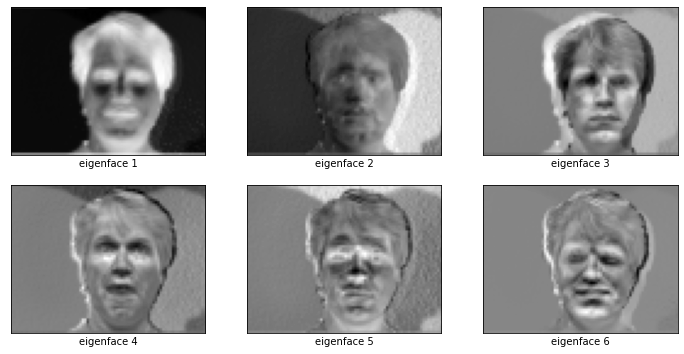

In [10]:
# plot first 6 eigenfaces from ED
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
for i, a in enumerate(ax.flat):
    a.imshow(U[:, i].reshape(w, h), cmap='gray')
    a.set(xticks=[], yticks=[], xlabel=f'eigenface {i+1}')

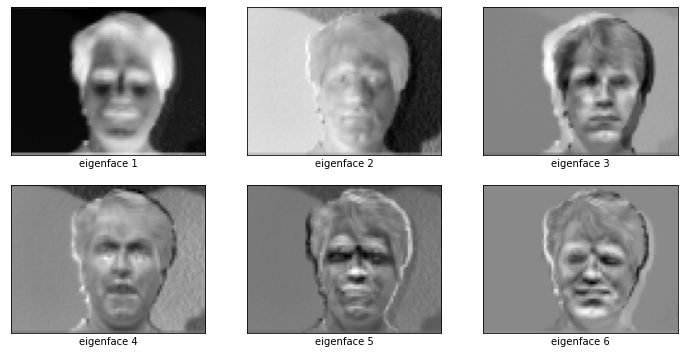

In [11]:
# plot first 6 eigenfaces from SVD
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
for i, a in enumerate(ax.flat):
    a.imshow(VT[i, :].reshape(w, h), cmap='gray')
    a.set(xticks=[], yticks=[], xlabel=f'eigenface {i+1}')

Minor subtleties aside, like value ranges, these two results are quivalent.

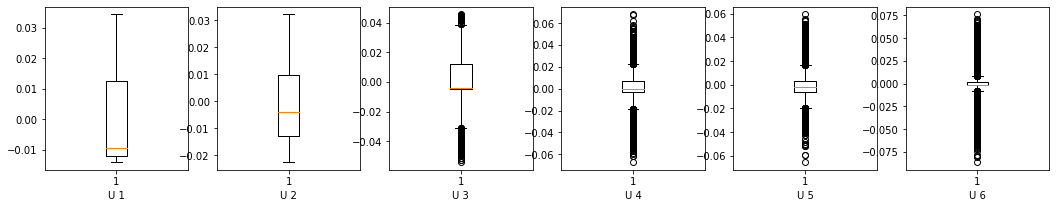

In [12]:
# box plots for U
fig, ax = plt.subplots(1, 6, figsize=(18, 3))
for i, a in enumerate(ax.flat):
    a.boxplot(U[:, i])
    a.set(xlabel=f'U {i+1}')

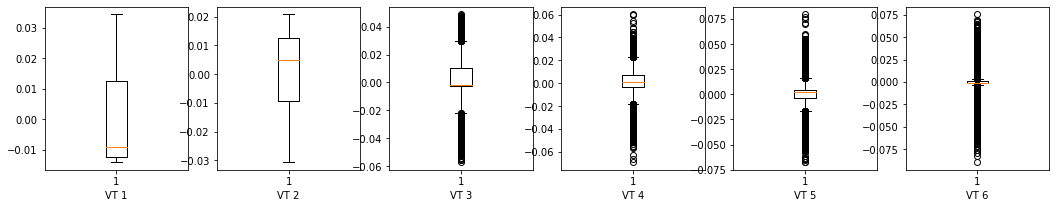

In [13]:
# box plots for VT
fig, ax = plt.subplots(1, 6, figsize=(18, 3))
for i, a in enumerate(ax.flat):
    a.boxplot(VT[i, :])
    a.set(xlabel=f'VT {i+1}')